# Introduction

## Our Lab

In this lab, we are using time series to investigate El Ni&ntilde;o Southern Oscillation (ENSO) data. Our methods will be based off of the paper *Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle* by Lam et al (2019). We will begin with the summary of the Lam et al paper, separated by objective, methods, and results. Then, I will show my methods for cleaning and sorting the data. Lastly, I will finish by creating various plots, such as time series, periodograms, and sample autocorrelation plots. My goal is to identify years within the dataset that had an ENSO event.


## Summary of objective, methods, and results


### Objective
Those who conducted this study had the objective of "understanding the links between ENSO (El Ni&ntilde;o Southern Oscillation) and the numbers of people affected by natural disasters". Exploring this relationship will help predict when and where effects of natural disasters are most likely to be strongest.

By applying time-series regression techniques to extended datasets from the EM-DAT International Disaster Database, we characterised annual relationships between two ENSO indices, the Oceanic Niño Index (ONI) and the multivariate El Niño Index (MEI), and disaster burdens at the global, regional and country level between 1964–2017."


### Methods
In order to accomplish their goal, the scientists applied a time-series regression to various international disaster datasets on a global, regional, and national level.

These datasets include:
* annual numbers of people affected by natural disasters  from EM-DAT International Disaster Database
* two most common ENSO indices from the National Oceanic and Atmospheric Administration
  * Oceanic Niño Index (ONI)
  * multivariate El Niño Index (MEI)

Definition of a disaster:
* 10 or more people reported killed
* 100 or more people being affected
* declaration of a state of emergency
* call for international assistance. 

Since floods, droughts, and storms accounted for more than 95% of the total affected, the study focused on these three disasters. These disasters also saw the most occurences in East, South, and Southeast Asia, so these three regions were analyzed. On the regional and country level, there was not enough drought data, so they were only analyzed at the global level. 

Countries that were assessed:
- Flood
  * Bangladesh
  * China
  * India
  * Indonesia
  * Pakistan
  * Philippines
  * Sri Lanka
  * Thailand
  * Vietnam
- Storm
  * Bangladesh
  * China
  * Hong Kong
  * India
  * Japan
  * Philippines
  * South Korea
  * Vietnam

People affected by disasters (PAD) is a rate that was calculated using UN population data (affected per 1000 people).

Two "types" of ENSO events that were considered in the study:
* Type 1: El Ni&ntilde;o began in the second half of the year prior to the disaster year and ended within the first half of the same year as the disaster year
* Type 2: El Ni&ntilde;o began in the second half of the same year as the disaster year and ended in the first half of the following year

ONI is a three-month moving average of sea surface temperature (SST) anomalies in the Niño 3.4 region. The period from December to February (3 months) was used to represent ENSO intensity.

MEI is a two-month seasonal index that takes six variables into account:
* sea-level pressure
* zonal component of the surface wind 
* meridional component of the surface wind 
* sea surface temperature
* surface air temperature
* total cloudiness fraction of the sky

Intensity of El Ni&ntilde;o (based on ONI and MEI):

* Very strong: > 2
* Strong: 1.5-1.9
* Moderate: 1.0-1.4
* Weak: 0.5-0.9

The period from December to January was used to represent ENSO intensity.

Regression techniques were also used to model nonlinear and lag effects.

### Results

On the whole, there has been a slight trend of increasing yearly PAD rates. When analyzing individual disasters, floods follow a similar trend, but droughts and storms rates have subsided in the last two decades.

Throughout the 54 year period of study, it was determined that there were seven instancse of El Niño or La Niña in the years 1965, 1972, 1987, 1991, 1998, 2002 and 2015. This means that the standardized PAD rate of those years was greater than 1.

For type 1 events (defined above), median PAD rates increased during El Niño years compared to La Niña or neutral years. Flood-related PAD rates had a similar pattern. For type 2 events, both El Niño and La Niña years had higher PAD rates than neutral years. Drought-related PAD rates followed a similar trend, but Flood-related PAD rates increased during La Niña years instead.

Regionally, in East Asia and South Asia, El Niño correlated with higher flood-related PAD rates whilst La Niña saw higher storm-related PAD rates.

At the national level, PAD rates in the Philippines and India were the most sensitive to ONI and MEI values. India in particular had a higher risk of flood-related PAD rates with high MEI values even up to a year after.

Thailand, China, Bangladesh and Sir Lanka higher mean flood-related PAD rates, despite no correlation to ONI or MEI. Hong Kong was at risk of high storm-related PAD rates with low MEI values even up to 3 years later.

In general, The Philippines was highly prone to storms-related PAD rates every year, but especially during periods of decreasing ONI and MEI.

# Methods

In [61]:
# installing packages
install.packages("readxl")
install.packages("stringr")
install.packages("tidyverse")
install.packages("tswge")
library(readxl)
library(stringr)
library(tidyverse)
library(tswge)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### ONI
ONI dataset: https://psl.noaa.gov/data/correlation/oni.data

In [62]:
# loading oni data
oni.raw <- read.csv("ONI_data.csv")
# subsetting the data to focus on the December-February period
oni.raw <- oni.raw[c(1,2)]
# we are also focusing only on 1964-2017 (same as Lam et al)
oni.raw <- oni.raw[oni.raw$year > 1963 & oni.raw$year < 2018,]
# create the time series
oni.ts <- ts(oni.raw$DJF, start = c(1964,1), end = c(2017,1), frequency = 1)

### MEI
MEI dataset: https://psl.noaa.gov/enso/mei.old/table.html

In [63]:
# loading mei data
mei.raw <- read.csv("MEI_data.csv")
# removing unnecessary lines from the bottom of the dataframe
mei.raw <- mei.raw[-c(43,44,45,46,47),]
# subsetting the data to focus on the December-January period
mei.raw <- mei.raw[c(1,2)]
# turn the data into numbers (from characters)
mei.raw$DJ <- as.numeric(as.character(mei.raw$DJ))
# create the time series
mei.ts <- ts(mei.raw$DJ, start = c(1979,1), end = c(2017,1), frequency = 1)

### EMDAT
EMDAT dataset: https://public.emdat.be (selected all regions, 1964-2017, no technological, complex, extra-terrestrial, or geophysical data)

Population dataset: http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv

In [64]:
# loading emdat data
emdat.raw <- read.csv("emdat.csv", header = TRUE)
# remove unnecessary lines from the top
emdat.raw <- emdat.raw[-c(1:5),]
# turn the first line into the column names
colnames(emdat.raw) <- as.list(as.data.frame(c(emdat.raw[1,])))
emdat.raw <- emdat.raw[-c(1),]
# subset only the columns of interest
columns <- c("Year", "ISO", "Country", "Total Affected", "Total Deaths")
emdat.raw <- emdat.raw[columns]
# create a list of Total Affected by Disaster by adding affected and deaths together
emdat.raw[is.na(emdat.raw)] <- 0
emdat.raw$`Total Affected` <- as.numeric(as.character(emdat.raw$`Total Affected`))
emdat.raw$`Total Deaths` <- as.numeric(as.character(emdat.raw$`Total Deaths`))
emdat.raw$`AD` <- emdat.raw$`Total Affected` + emdat.raw$`Total Deaths`
emdat.raw[is.na(emdat.raw)] <- 0

In [65]:
# loading the population data
pop.raw <- read.csv("POP_data.csv", header = TRUE, skip = 4)

In [66]:
# combine emdat and population data
rows <- nrow(emdat.raw)
for (i in 1:rows) {
  # match up countries
  temp.country <- emdat.raw[i, ]['ISO']
  temp.year <- emdat.raw[i, ]['Year']
  temp.year <- paste("X", temp.year, sep = "")
  temp.match <- match(temp.country, pop.raw$Country.Code)
  # create population column (including if there is no available population)
  if (!is.na(temp.match)) {
    temp.pop <- pop.raw[,temp.year][temp.match]
    emdat.raw[i, "Population"] = temp.pop
  } else {
    emdat.raw[i, "Population"] = NA
  }
}

In [67]:
# sum all populations and those affected by disaster from the same year
emdat.pad <- aggregate(AD~Year,emdat.raw,sum)
emdat.pop <- aggregate(Population~Year,emdat.raw,sum)
emdat.pad["Pop"] = emdat.pop[2]
# get PAD per 1000
emdat.pad["Temp"] = emdat.pad[2]/emdat.pad[3]
emdat.pad["PAD"] = emdat.pad[4] * 1000
# create the dataframe
pad.df <- emdat.pad[c(1,5)]
# create the time series
pad.ts <- ts(pad.df$PAD, start = c(1964,1), end = c(2017,1),frequency = 1)

### NOAA Land and Ocean

Here is a dataset that I found at : https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/12/1880-2021.csv

This includes land and ocean surface temperature anomalies from 1880-2021.

In [68]:
noaa.raw <- read.csv("1880-2021.csv")
noaa.raw <- cbind(Year = rownames(noaa.raw), noaa.raw)
rownames(noaa.raw) <- 1:nrow(noaa.raw)
noaa.raw <- noaa.raw[-c(1:4),]
noaa.raw$Global.Land.and.Ocean.Temperature.Anomalies <- as.numeric(as.character(noaa.raw$Global.Land.and.Ocean.Temperature.Anomalies))
noaa.ts <- ts(noaa.raw$Global.Land.and.Ocean.Temperature.Anomalies,start=c(1880,1),end=c(2021),frequency = 12)

# Results and Discussion

Here I will produce several plots for each of the datasets. First, I will try to reproduce Figure 1 from the Lam et al paper. Then, I will produce a time series, periodogram, sample autocorrelation plot, and a parzen plot for each dataset.

##### My attempt at reproducing Figure 1 from the Lam et al. paper:

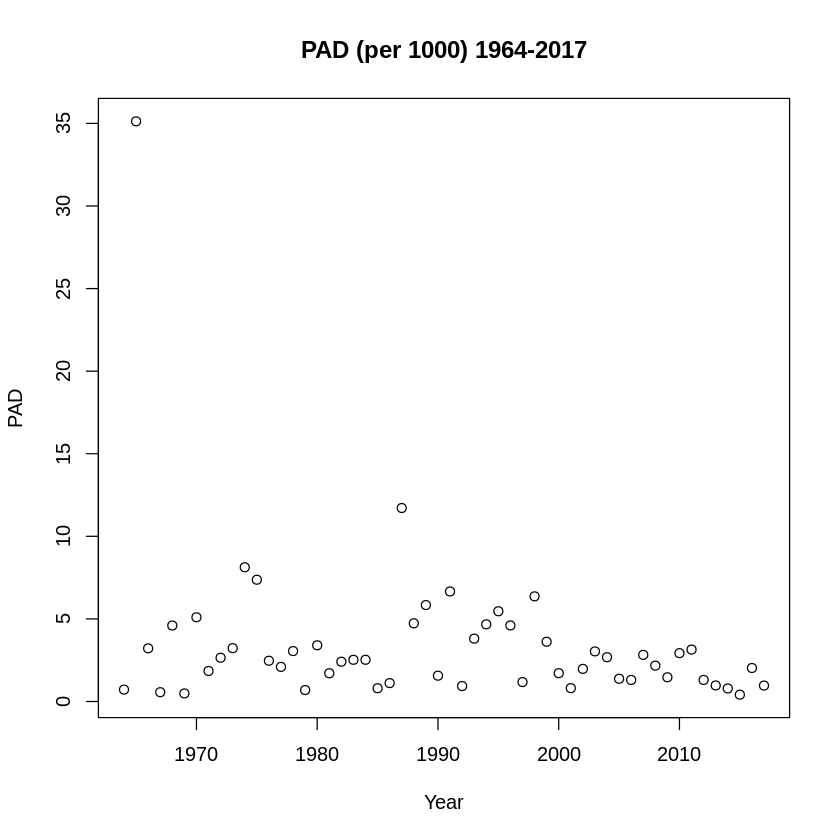

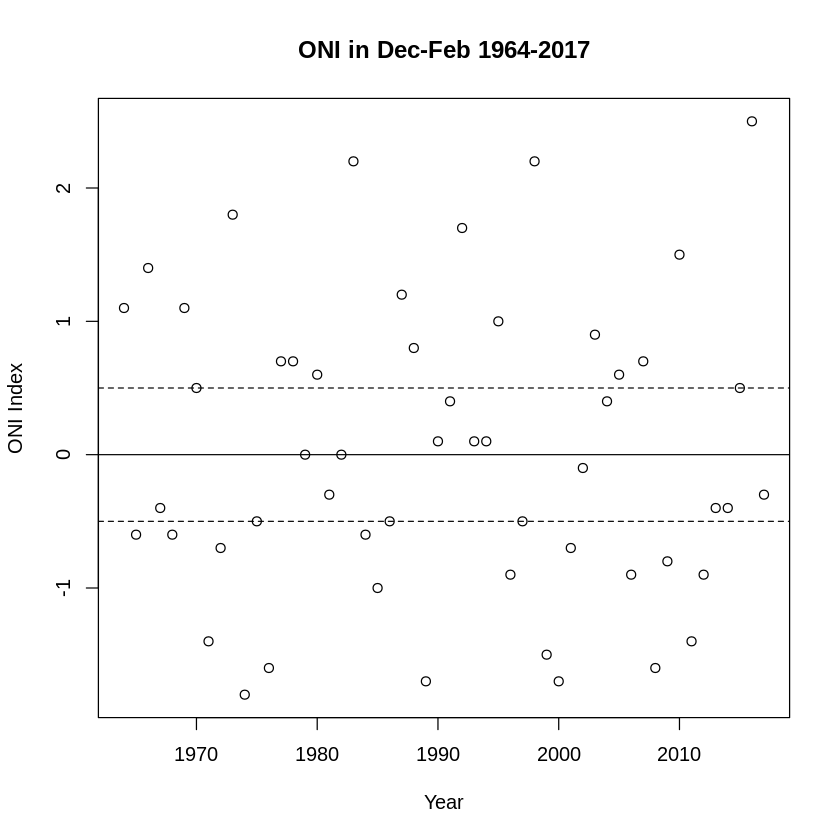

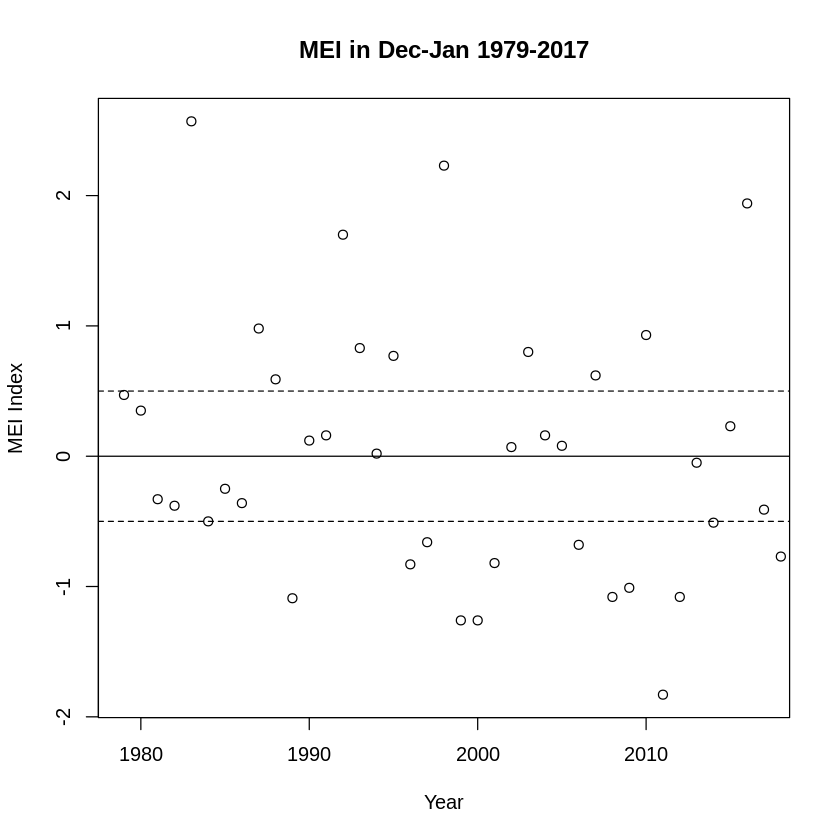

In [69]:
fig_1_PAD <- plot(pad.df$Year, pad.df$PAD, main = "PAD (per 1000) 1964-2017",
 xlab = "Year",
 ylab='PAD',
 xlim=c(1964,2017))

fig_1_ONI <- plot(oni.raw$year, oni.raw$DJF, main = "ONI in Dec-Feb 1964-2017",
 xlab = "Year",
 ylab='ONI Index',
 xlim=c(1964,2017))
 abline(h=0)
 abline(h=.5, lty='dashed')
 abline(h=-.5, lty="dashed")

fig_1_MEI <- plot(mei.raw$Year, mei.raw$DJ, main = "MEI in Dec-Jan 1979-2017",
 xlab = "Year",
 ylab='MEI Index',
 xlim=c(1979,2017))
 abline(h=0)
 abline(h=.5, lty='dashed')
 abline(h=-.5, lty="dashed")

1. identify patterns such as periodic versus aperiodic behavior, find dominant frequencies
1. Identify El Ni&ntilde;o years (and its dominant frequency) in the datasets you found based on the metrics provided in the paper.

## ONI

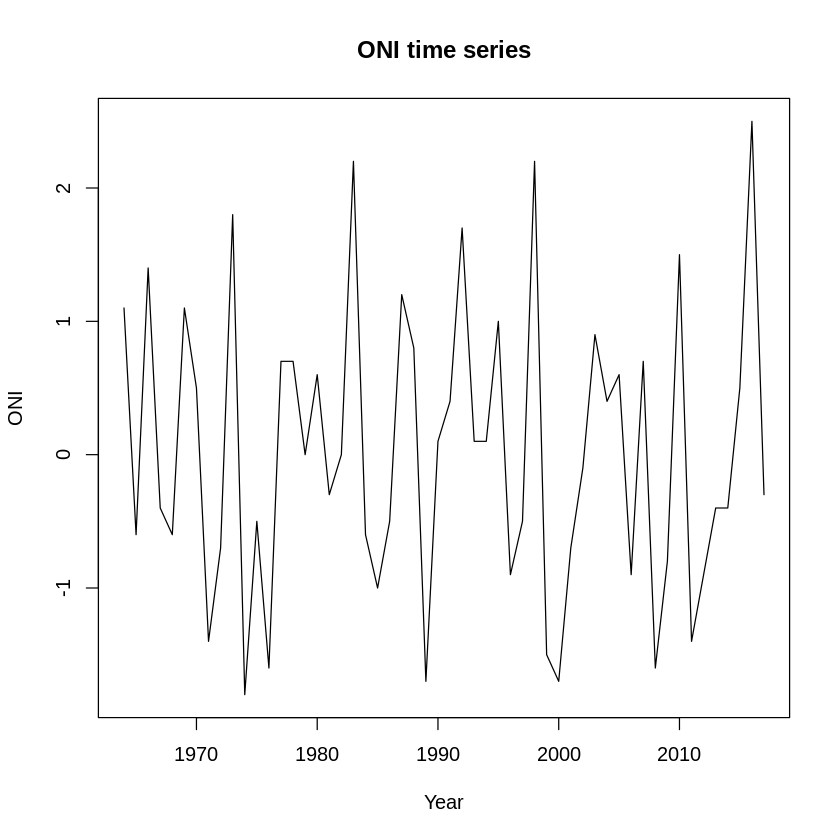

In [70]:
plot(oni.ts, xlab = "Year", ylab = "ONI", main = "ONI time series")

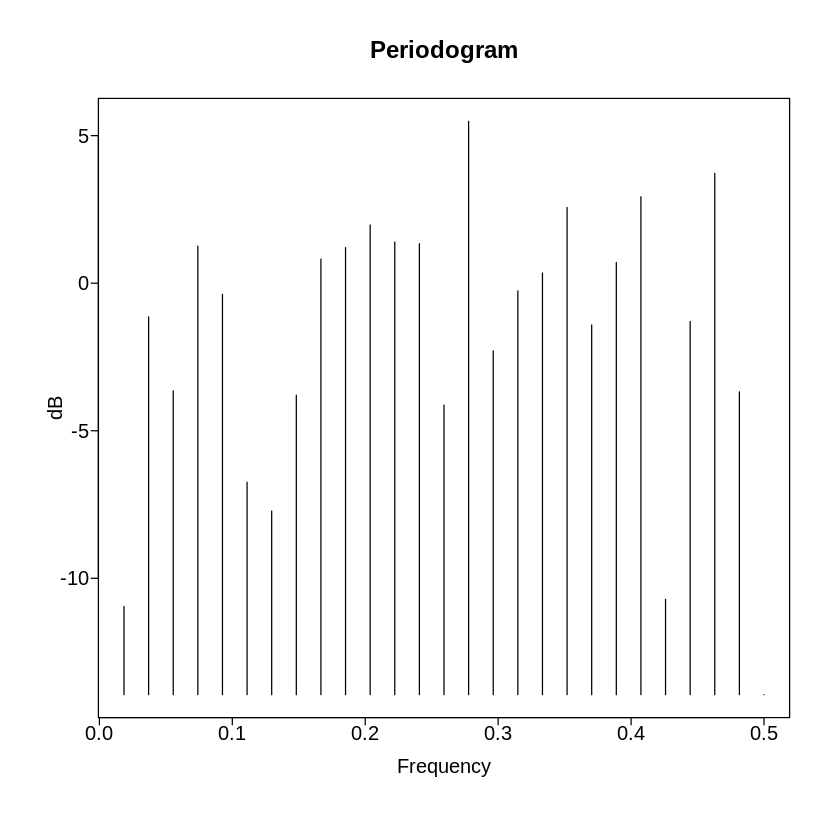

In [71]:
periodogram <- period.wge(oni.raw$DJF, plot=TRUE)

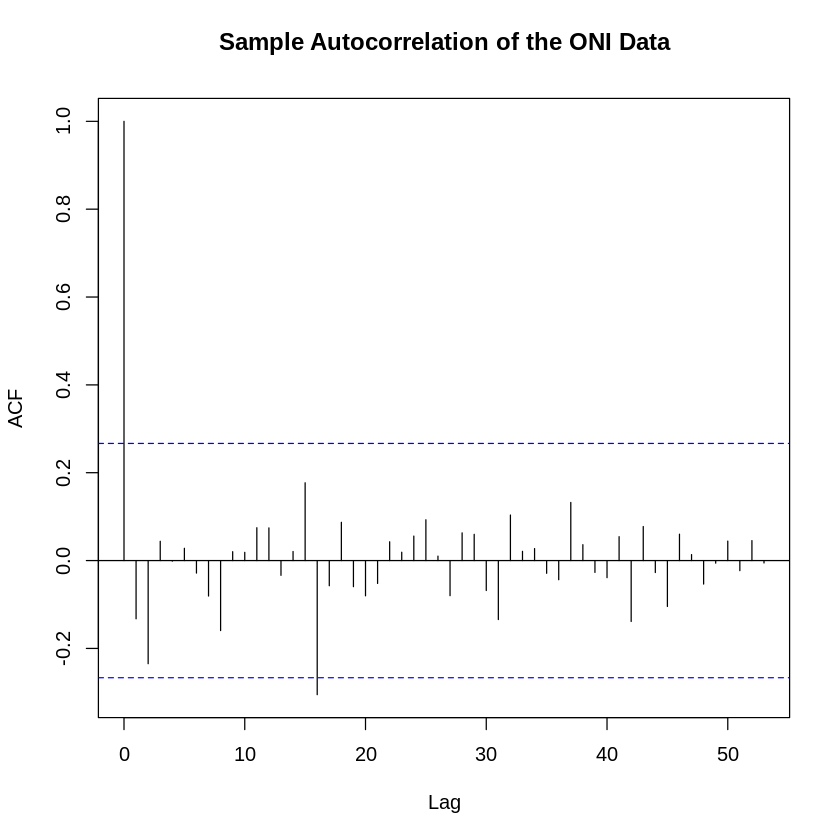

In [72]:
acf(oni.raw$DJF, type = "correlation", main="Sample Autocorrelation of the ONI Data", lag = 100)

$freq
 [1] 0.01851852 0.03703704 0.05555556 0.07407407 0.09259259 0.11111111
 [7] 0.12962963 0.14814815 0.16666667 0.18518519 0.20370370 0.22222222
[13] 0.24074074 0.25925926 0.27777778 0.29629630 0.31481481 0.33333333
[19] 0.35185185 0.37037037 0.38888889 0.40740741 0.42592593 0.44444444
[25] 0.46296296 0.48148148 0.50000000

$pzgram
 [1] -4.53722684 -3.53088998 -2.63018824 -2.12271357 -1.98156509 -1.93562087
 [7] -1.60298636 -0.85652463  0.03948999  0.77253812  1.21173508  1.38858574
[13]  1.42157264  1.43879833  1.50439675  1.59097484  1.61989486  1.52531386
[19]  1.29566413  0.98015877  0.65479711  0.35643536  0.04388065 -0.35735237
[25] -0.85739196 -1.32578836 -1.52581887

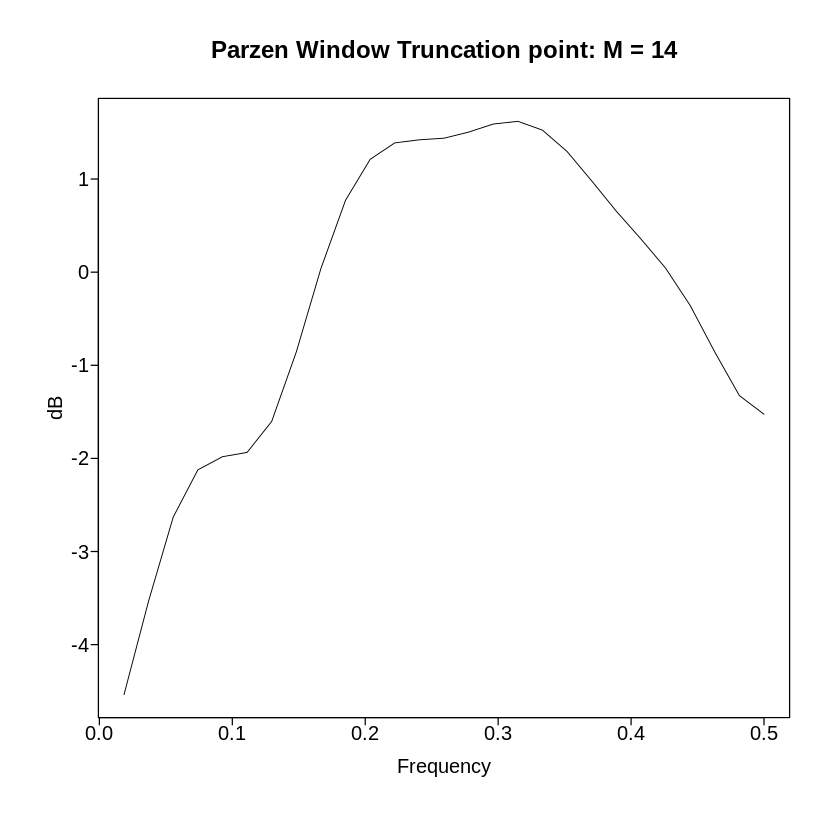

In [73]:
parzen.wge(oni.raw$DJF,trunc=0)

In the top time series plot, we can see an oscillatory pattern with peaks occuring about every 3 years. On our periodogram, we can see peak frequencies between .25 and .5, but our parzen window has a peak of about .31. This means that the period is about 3.25. Since this is occuring every year, we find a similar trend to our analysis of the time series. In addition, we can see the warming and cooling nature of ENSO on the sample autocorrelation plot, with the dampening autocorrelation flipping between positive and negative.

## MEI

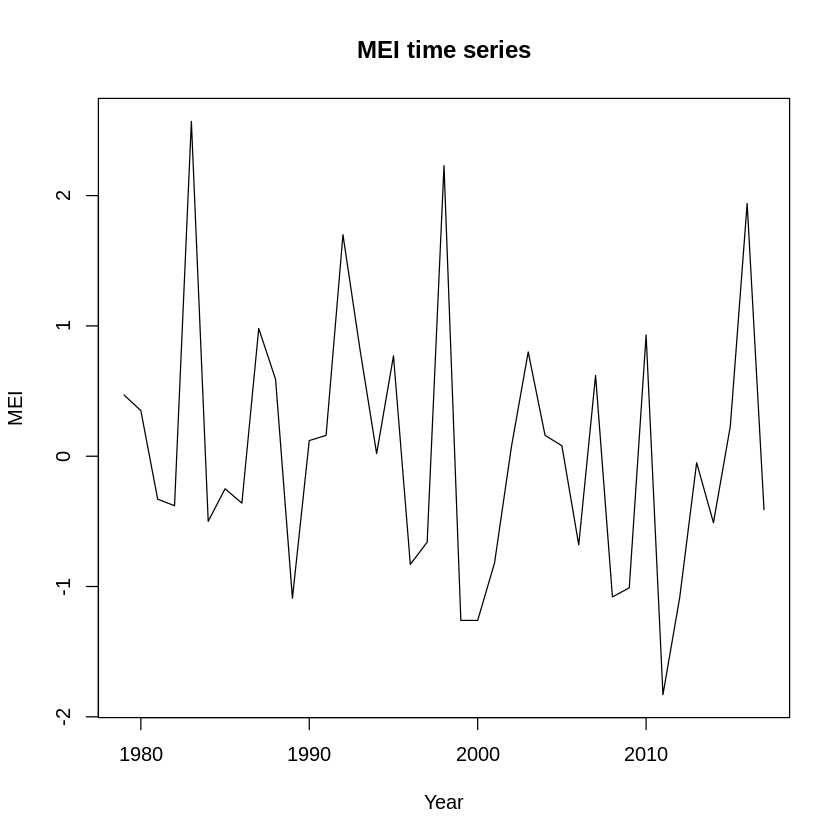

In [74]:
plot(mei.ts, xlab = "Year", ylab = "MEI", main = "MEI time series")

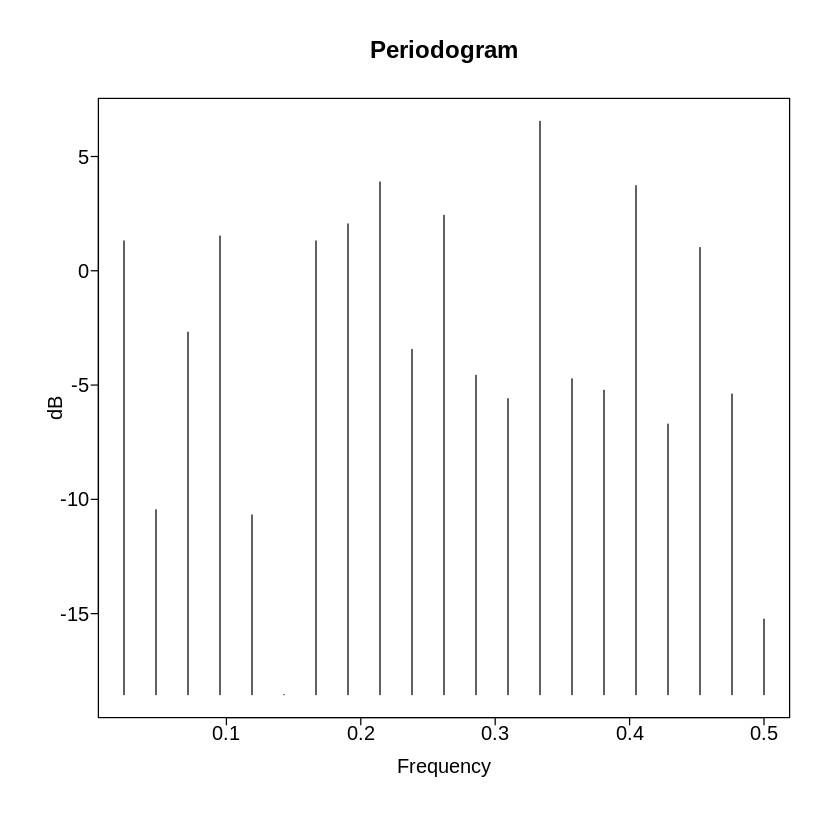

In [75]:
periodogram <- period.wge(mei.raw$DJ, plot=TRUE)

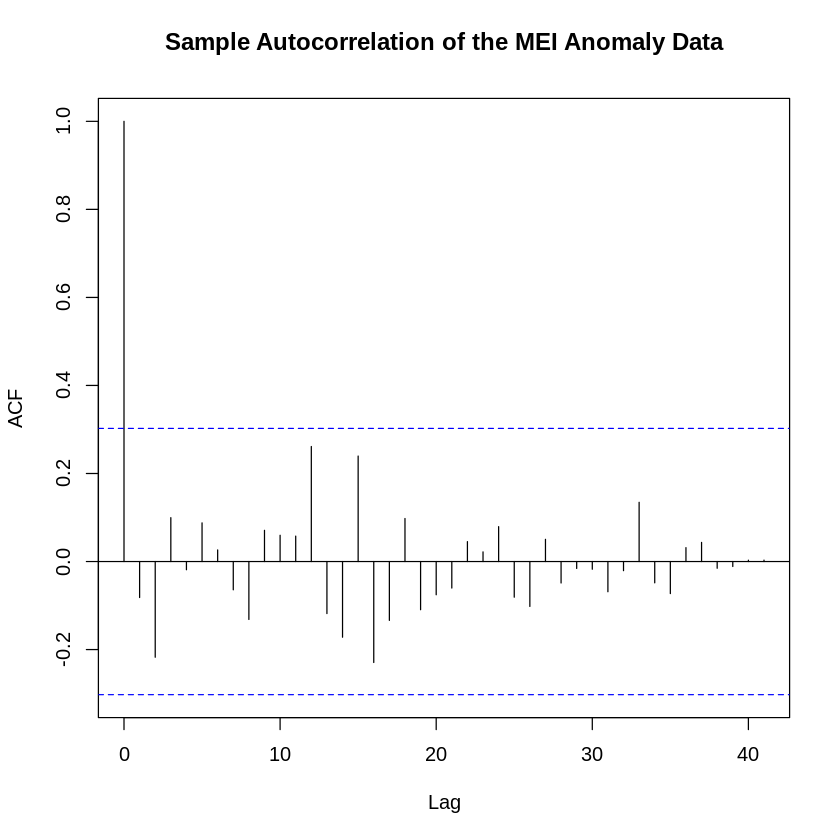

In [76]:
acf(mei.raw$DJ, type = "correlation", main="Sample Autocorrelation of the MEI Anomaly Data", lag = 100)

$freq
 [1] 0.02380952 0.04761905 0.07142857 0.09523810 0.11904762 0.14285714
 [7] 0.16666667 0.19047619 0.21428571 0.23809524 0.26190476 0.28571429
[13] 0.30952381 0.33333333 0.35714286 0.38095238 0.40476190 0.42857143
[19] 0.45238095 0.47619048 0.50000000

$pzgram
 [1] -1.92379812 -1.91935397 -1.93974356 -1.88127853 -1.52090925 -0.78341329
 [7]  0.08106307  0.75186407  1.09483103  1.18959171  1.23233535  1.35516448
[13]  1.50303195  1.52581403  1.33259295  0.92781413  0.34967020 -0.39289338
[19] -1.28437159 -2.14274661 -2.52722534

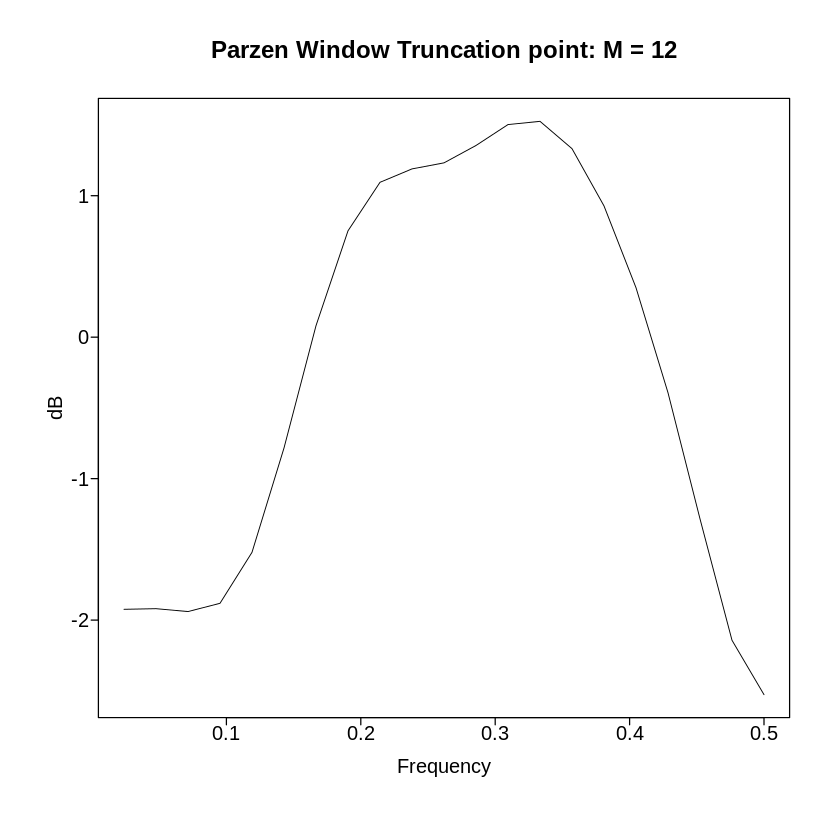

In [77]:
parzen.wge(mei.raw$DJ,trunc=0)

Similar to the ONI plots, we can see spikes about every 3 years in the time series, which is backed by a peak of around 0.33 in the parzen window and periodogram. 0.33 translates to about 3.03 years. In the autocorrelation function, there is some obvious dampening once again with a slight sinusoidal pattern about the x-axis.

## PAD

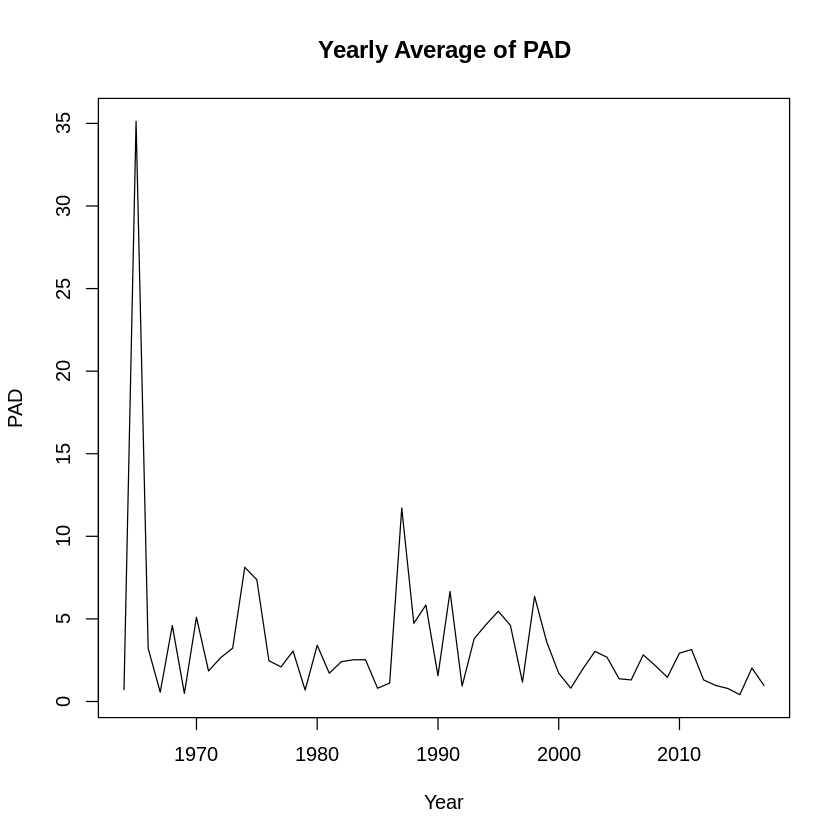

In [78]:
plot(pad.ts, xlab = "Year", ylab = "PAD", main = "Yearly Average of PAD")

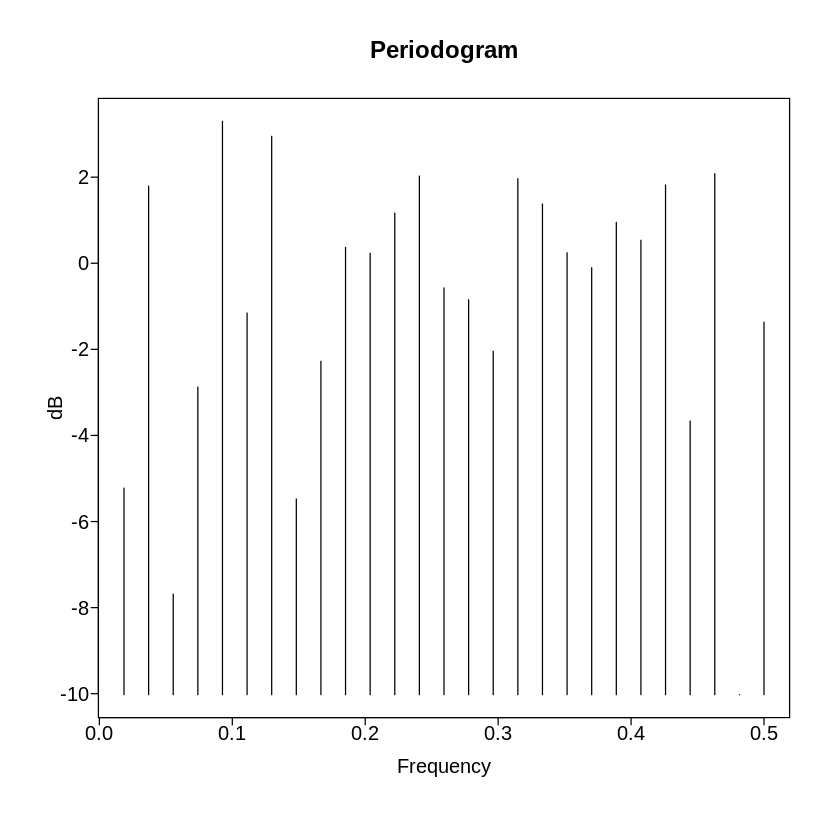

In [79]:
periodogram <- period.wge(pad.ts, plot = TRUE)

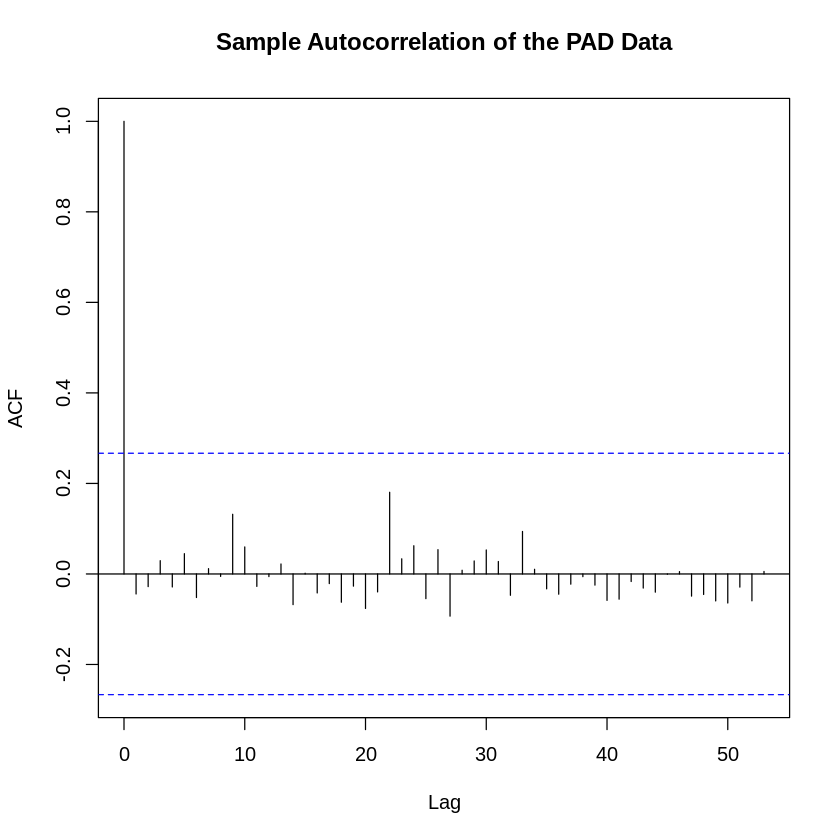

In [80]:
acf(pad.ts, type = "correlation", main="Sample Autocorrelation of the PAD Data", lag = 100)

$freq
   [1] 8.170602e-05 1.634120e-04 2.451181e-04 3.268241e-04 4.085301e-04
   [6] 4.902361e-04 5.719422e-04 6.536482e-04 7.353542e-04 8.170602e-04
  [11] 8.987662e-04 9.804723e-04 1.062178e-03 1.143884e-03 1.225590e-03
  [16] 1.307296e-03 1.389002e-03 1.470708e-03 1.552414e-03 1.634120e-03
  [21] 1.715826e-03 1.797532e-03 1.879238e-03 1.960945e-03 2.042651e-03
  [26] 2.124357e-03 2.206063e-03 2.287769e-03 2.369475e-03 2.451181e-03
  [31] 2.532887e-03 2.614593e-03 2.696299e-03 2.778005e-03 2.859711e-03
  [36] 2.941417e-03 3.023123e-03 3.104829e-03 3.186535e-03 3.268241e-03
  [41] 3.349947e-03 3.431653e-03 3.513359e-03 3.595065e-03 3.676771e-03
  [46] 3.758477e-03 3.840183e-03 3.921889e-03 4.003595e-03 4.085301e-03
  [51] 4.167007e-03 4.248713e-03 4.330419e-03 4.412125e-03 4.493831e-03
  [56] 4.575537e-03 4.657243e-03 4.738949e-03 4.820655e-03 4.902361e-03
  [61] 4.984067e-03 5.065773e-03 5.147479e-03 5.229185e-03 5.310891e-03
  [66] 5.392597e-03 5.474303e-03 5.556009e-03 5.637715e-03 5.719422e-03
  [71] 5.801128e-03 5.882834e-03 5.964540e-03 6.046246e-03 6.127952e-03
  [76] 6.209658e-03 6.291364e-03 6.373070e-03 6.454776e-03 6.536482e-03
  [81] 6.618188e-03 6.699894e-03 6.781600e-03 6.863306e-03 6.945012e-03
  [86] 7.026718e-03 7.108424e-03 7.190130e-03 7.271836e-03 7.353542e-03
  [91] 7.435248e-03 7.516954e-03 7.598660e-03 7.680366e-03 7.762072e-03
  [96] 7.843778e-03 7.925484e-03 8.007190e-03 8.088896e-03 8.170602e-03
 [101] 8.252308e-03 8.334014e-03 8.415720e-03 8.497426e-03 8.579132e-03
 [106] 8.660838e-03 8.742544e-03 8.824250e-03 8.905956e-03 8.987662e-03
 [111] 9.069368e-03 9.151074e-03 9.232780e-03 9.314486e-03 9.396192e-03
 [116] 9.477899e-03 9.559605e-03 9.641311e-03 9.723017e-03 9.804723e-03
 [121] 9.886429e-03 9.968135e-03 1.004984e-02 1.013155e-02 1.021325e-02
 [126] 1.029496e-02 1.037666e-02 1.045837e-02 1.054008e-02 1.062178e-02
 [131] 1.070349e-02 1.078519e-02 1.086690e-02 1.094861e-02 1.103031e-02
 [136] 1.111202e-02 1.119372e-02 1.127543e-02 1.135714e-02 1.143884e-02
 [141] 1.152055e-02 1.160226e-02 1.168396e-02 1.176567e-02 1.184737e-02
 [146] 1.192908e-02 1.201079e-02 1.209249e-02 1.217420e-02 1.225590e-02
 [151] 1.233761e-02 1.241932e-02 1.250102e-02 1.258273e-02 1.266443e-02
 [156] 1.274614e-02 1.282785e-02 1.290955e-02 1.299126e-02 1.307296e-02
 [161] 1.315467e-02 1.323638e-02 1.331808e-02 1.339979e-02 1.348149e-02
 [166] 1.356320e-02 1.364491e-02 1.372661e-02 1.380832e-02 1.389002e-02
 [171] 1.397173e-02 1.405344e-02 1.413514e-02 1.421685e-02 1.429855e-02
 [176] 1.438026e-02 1.446197e-02 1.454367e-02 1.462538e-02 1.470708e-02
 [181] 1.478879e-02 1.487050e-02 1.495220e-02 1.503391e-02 1.511561e-02
 [186] 1.519732e-02 1.527903e-02 1.536073e-02 1.544244e-02 1.552414e-02
 [191] 1.560585e-02 1.568756e-02 1.576926e-02 1.585097e-02 1.593267e-02
 [196] 1.601438e-02 1.609609e-02 1.617779e-02 1.625950e-02 1.634120e-02
 [201] 1.642291e-02 1.650462e-02 1.658632e-02 1.666803e-02 1.674973e-02
 [206] 1.683144e-02 1.691315e-02 1.699485e-02 1.707656e-02 1.715826e-02
 [211] 1.723997e-02 1.732168e-02 1.740338e-02 1.748509e-02 1.756679e-02
 [216] 1.764850e-02 1.773021e-02 1.781191e-02 1.789362e-02 1.797532e-02
 [221] 1.805703e-02 1.813874e-02 1.822044e-02 1.830215e-02 1.838385e-02
 [226] 1.846556e-02 1.854727e-02 1.862897e-02 1.871068e-02 1.879238e-02
 [231] 1.887409e-02 1.895580e-02 1.903750e-02 1.911921e-02 1.920092e-02
 [236] 1.928262e-02 1.936433e-02 1.944603e-02 1.952774e-02 1.960945e-02
 [241] 1.969115e-02 1.977286e-02 1.985456e-02 1.993627e-02 2.001798e-02
 [246] 2.009968e-02 2.018139e-02 2.026309e-02 2.034480e-02 2.042651e-02
 [251] 2.050821e-02 2.058992e-02 2.067162e-02 2.075333e-02 2.083504e-02
 [256] 2.091674e-02 2.099845e-02 2.108015e-02 2.116186e-02 2.124357e-02
 [261] 2.132527e-02 2.140698e-02 2.148868e-02 2.157039e-02 2.165210e-02
 [266] 2.173380e-02 2.181551e-02 2.189721e-02 2.197892e-02 2.206063e-02
 [271] 2.214233e-02 2.222404e-02 2.230574e-02 2.238745e-02 2.246916e-02
 [276] 2.255086e-02 2.263257e-02 2

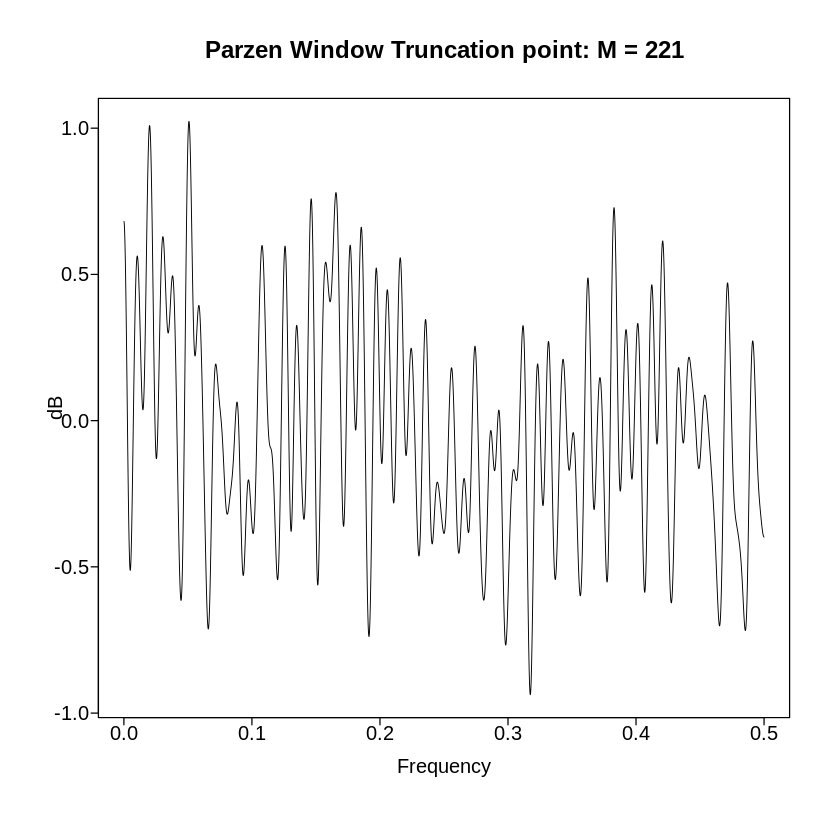

In [81]:
parzen.wge(emdat.raw$AD,trunc=0)

Here we can see a spike in the PAD rate at the beginning near 1965 followed by more normal sinusoidal behavior. Although there are several spikes afterwards, none of them are nearly as high. In the periodogram, there are no obvious peaks, but the parzen window shows several peaks near .04, .16, and .38. This translates to periods of about 25, 6.25, and 2.6 years, respectively. In the sample autocorrelation, we can see there there more of a dampening effect here than with ONI and MEI.

## NOAA Land and Ocean Anomalies

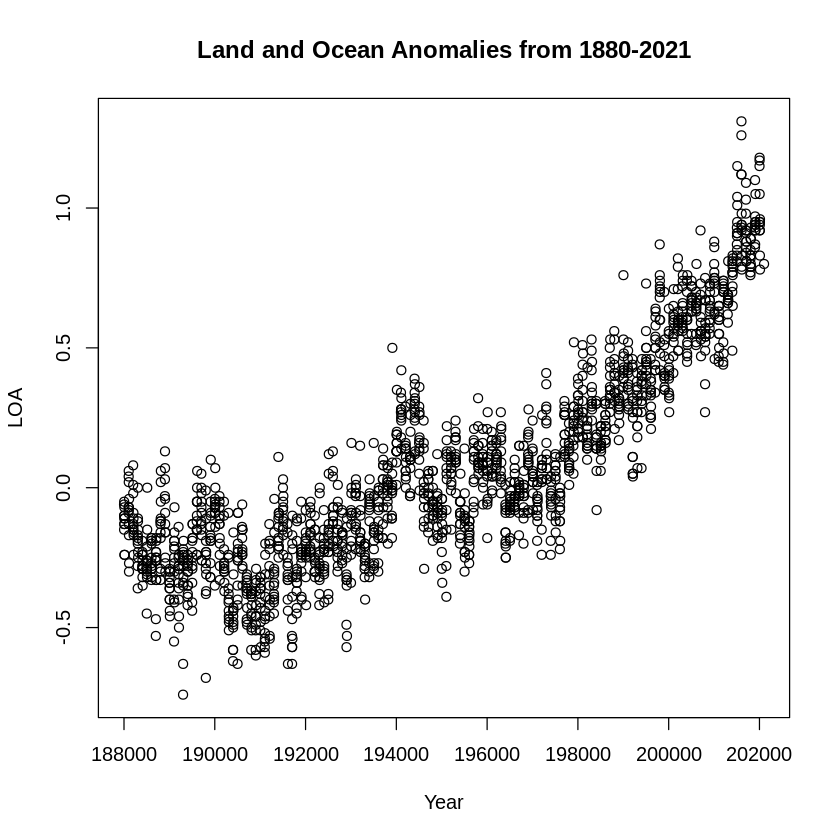

In [82]:
fig_1_LOA <- plot(noaa.raw$Year, noaa.raw$Global.Land.and.Ocean.Temperature.Anomalies, main = "Land and Ocean Anomalies from 1880-2021",
 xlab = "Year",
 ylab='LOA',
 xlim=c(188000,202100))

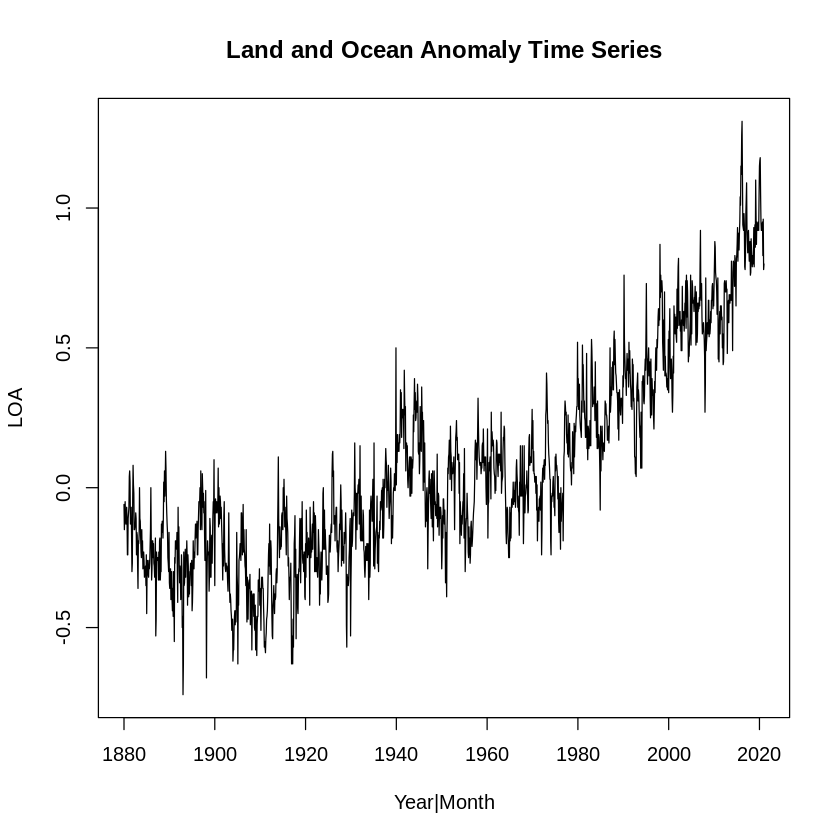

In [83]:
plot(noaa.ts, xlab = "Year|Month", ylab = "LOA", main = "Land and Ocean Anomaly Time Series")

$freq
  [1] 0.0005906675 0.0011813349 0.0017720024 0.0023626698 0.0029533373
  [6] 0.0035440047 0.0041346722 0.0047253396 0.0053160071 0.0059066745
 [11] 0.0064973420 0.0070880095 0.0076786769 0.0082693444 0.0088600118
 [16] 0.0094506793 0.0100413467 0.0106320142 0.0112226816 0.0118133491
 [21] 0.0124040165 0.0129946840 0.0135853514 0.0141760189 0.0147666864
 [26] 0.0153573538 0.0159480213 0.0165386887 0.0171293562 0.0177200236
 [31] 0.0183106911 0.0189013585 0.0194920260 0.0200826934 0.0206733609
 [36] 0.0212640284 0.0218546958 0.0224453633 0.0230360307 0.0236266982
 [41] 0.0242173656 0.0248080331 0.0253987005 0.0259893680 0.0265800354
 [46] 0.0271707029 0.0277613703 0.0283520378 0.0289427053 0.0295333727
 [51] 0.0301240402 0.0307147076 0.0313053751 0.0318960425 0.0324867100
 [56] 0.0330773774 0.0336680449 0.0342587123 0.0348493798 0.0354400473
 [61] 0.0360307147 0.0366213822 0.0372120496 0.0378027171 0.0383933845
 [66] 0.0389840520 0.0395747194 0.0401653869 0.0407560543 0.0413467218
 [71] 0.0419373892 0.0425280567 0.0431187242 0.0437093916 0.0443000591
 [76] 0.0448907265 0.0454813940 0.0460720614 0.0466627289 0.0472533963
 [81] 0.0478440638 0.0484347312 0.0490253987 0.0496160662 0.0502067336
 [86] 0.0507974011 0.0513880685 0.0519787360 0.0525694034 0.0531600709
 [91] 0.0537507383 0.0543414058 0.0549320732 0.0555227407 0.0561134082
 [96] 0.0567040756 0.0572947431 0.0578854105 0.0584760780 0.0590667454
[101] 0.0596574129 0.0602480803 0.0608387478 0.0614294152 0.0620200827
[106] 0.0626107501 0.0632014176 0.0637920851 0.0643827525 0.0649734200
[111] 0.0655640874 0.0661547549 0.0667454223 0.0673360898 0.0679267572
[116] 0.0685174247 0.0691080921 0.0696987596 0.0702894271 0.0708800945
[121] 0.0714707620 0.0720614294 0.0726520969 0.0732427643 0.0738334318
[126] 0.0744240992 0.0750147667 0.0756054341 0.0761961016 0.0767867690
[131] 0.0773774365 0.0779681040 0.0785587714 0.0791494389 0.0797401063
[136] 0.0803307738 0.0809214412 0.0815121087 0.0821027761 0.0826934436
[141] 0.0832841110 0.0838747785 0.0844654460 0.0850561134 0.0856467809
[146] 0.0862374483 0.0868281158 0.0874187832 0.0880094507 0.0886001181
[151] 0.0891907856 0.0897814530 0.0903721205 0.0909627880 0.0915534554
[156] 0.0921441229 0.0927347903 0.0933254578 0.0939161252 0.0945067927
[161] 0.0950974601 0.0956881276 0.0962787950 0.0968694625 0.0974601299
[166] 0.0980507974 0.0986414649 0.0992321323 0.0998227998 0.1004134672
[171] 0.1010041347 0.1015948021 0.1021854696 0.1027761370 0.1033668045
[176] 0.1039574719 0.1045481394 0.1051388069 0.1057294743 0.1063201418
[181] 0.1069108092 0.1075014767 0.1080921441 0.1086828116 0.1092734790
[186] 0.1098641465 0.1104548139 0.1110454814 0.1116361488 0.1122268163
[191] 0.1128174838 0.1134081512 0.1139988187 0.1145894861 0.1151801536
[196] 0.1157708210 0.1163614885 0.1169521559 0.1175428234 0.1181334908
[201] 0.1187241583 0.1193148258 0.1199054932 0.1204961607 0.1210868281
[206] 0.1216774956 0.1222681630 0.1228588305 0.1234494979 0.1240401654
[211] 0.1246308328 0.1252215003 0.1258121677 0.1264028352 0.1269935027
[216] 0.1275841701 0.1281748376 0.1287655050 0.1293561725 0.1299468399
[221] 0.1305375074 0.1311281748 0.1317188423 0.1323095097 0.1329001772
[226] 0.1334908447 0.1340815121 0.1346721796 0.1352628470 0.1358535145
[231] 0.1364441819 0.1370348494 0.1376255168 0.1382161843 0.1388068517
[236] 0.1393975192 0.1399881867 0.1405788541 0.1411695216 0.1417601890
[241] 0.1423508565 0.1429415239 0.1435321914 0.1441228588 0.1447135263
[246] 0.1453041937 0.1458948612 0.1464855286 0.1470761961 0.1476668636
[251] 0.1482575310 0.1488481985 0.1494388659 0.1500295334 0.1506202008
[256] 0.1512108683 0.1518015357 0.1523922032 0.1529828706 0.1535735381
[261] 0.1541642056 0.1547548730 0.1553455405 0.1559362079 0.1565268754
[266] 0.1571175428 0.1577082103 0.1582988777 0.1588895452 0.1594802126
[271] 0.1600708801 0.1606615475 0.1612522150 0.1618428825 0.1624335499
[276] 0.1630242174 0.1636148848 0.1642055523 0.1647962197 0.1653868872
[281] 0.1659775546

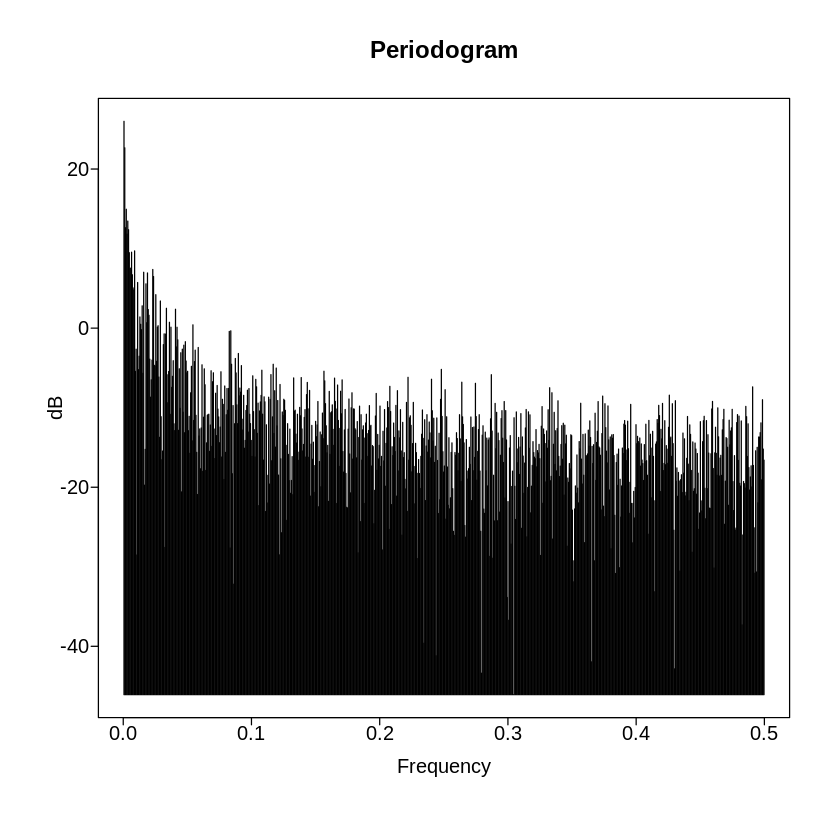

In [84]:
period.wge(noaa.ts, plot = TRUE)

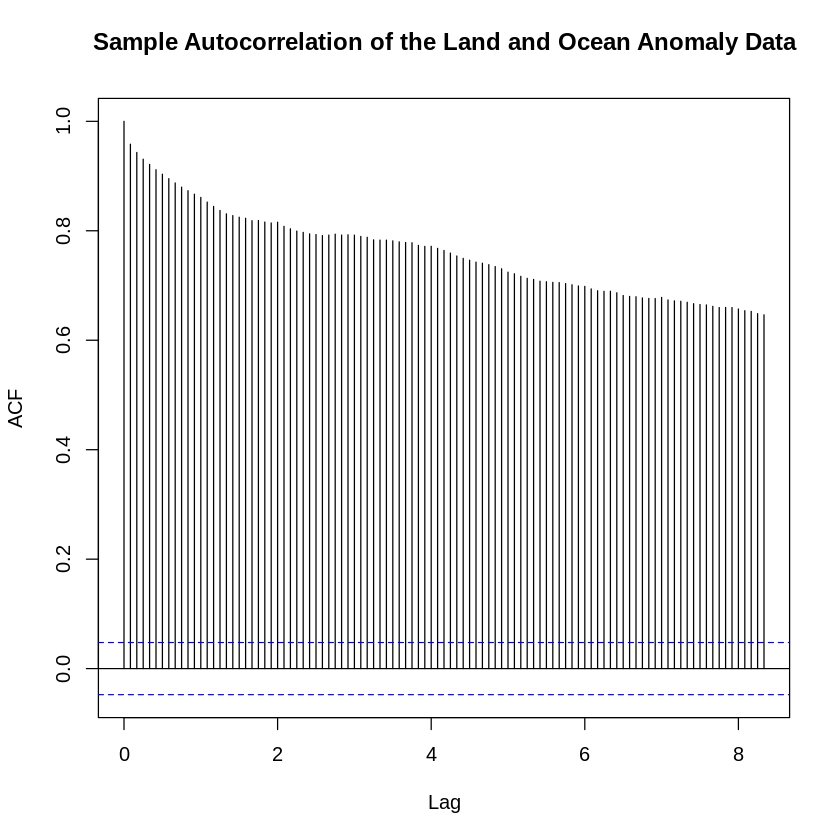

In [85]:
acf(noaa.ts, type = "correlation", main="Sample Autocorrelation of the Land and Ocean Anomaly Data", lag = 100)

$freq
  [1] 0.0005906675 0.0011813349 0.0017720024 0.0023626698 0.0029533373
  [6] 0.0035440047 0.0041346722 0.0047253396 0.0053160071 0.0059066745
 [11] 0.0064973420 0.0070880095 0.0076786769 0.0082693444 0.0088600118
 [16] 0.0094506793 0.0100413467 0.0106320142 0.0112226816 0.0118133491
 [21] 0.0124040165 0.0129946840 0.0135853514 0.0141760189 0.0147666864
 [26] 0.0153573538 0.0159480213 0.0165386887 0.0171293562 0.0177200236
 [31] 0.0183106911 0.0189013585 0.0194920260 0.0200826934 0.0206733609
 [36] 0.0212640284 0.0218546958 0.0224453633 0.0230360307 0.0236266982
 [41] 0.0242173656 0.0248080331 0.0253987005 0.0259893680 0.0265800354
 [46] 0.0271707029 0.0277613703 0.0283520378 0.0289427053 0.0295333727
 [51] 0.0301240402 0.0307147076 0.0313053751 0.0318960425 0.0324867100
 [56] 0.0330773774 0.0336680449 0.0342587123 0.0348493798 0.0354400473
 [61] 0.0360307147 0.0366213822 0.0372120496 0.0378027171 0.0383933845
 [66] 0.0389840520 0.0395747194 0.0401653869 0.0407560543 0.0413467218
 [71] 0.0419373892 0.0425280567 0.0431187242 0.0437093916 0.0443000591
 [76] 0.0448907265 0.0454813940 0.0460720614 0.0466627289 0.0472533963
 [81] 0.0478440638 0.0484347312 0.0490253987 0.0496160662 0.0502067336
 [86] 0.0507974011 0.0513880685 0.0519787360 0.0525694034 0.0531600709
 [91] 0.0537507383 0.0543414058 0.0549320732 0.0555227407 0.0561134082
 [96] 0.0567040756 0.0572947431 0.0578854105 0.0584760780 0.0590667454
[101] 0.0596574129 0.0602480803 0.0608387478 0.0614294152 0.0620200827
[106] 0.0626107501 0.0632014176 0.0637920851 0.0643827525 0.0649734200
[111] 0.0655640874 0.0661547549 0.0667454223 0.0673360898 0.0679267572
[116] 0.0685174247 0.0691080921 0.0696987596 0.0702894271 0.0708800945
[121] 0.0714707620 0.0720614294 0.0726520969 0.0732427643 0.0738334318
[126] 0.0744240992 0.0750147667 0.0756054341 0.0761961016 0.0767867690
[131] 0.0773774365 0.0779681040 0.0785587714 0.0791494389 0.0797401063
[136] 0.0803307738 0.0809214412 0.0815121087 0.0821027761 0.0826934436
[141] 0.0832841110 0.0838747785 0.0844654460 0.0850561134 0.0856467809
[146] 0.0862374483 0.0868281158 0.0874187832 0.0880094507 0.0886001181
[151] 0.0891907856 0.0897814530 0.0903721205 0.0909627880 0.0915534554
[156] 0.0921441229 0.0927347903 0.0933254578 0.0939161252 0.0945067927
[161] 0.0950974601 0.0956881276 0.0962787950 0.0968694625 0.0974601299
[166] 0.0980507974 0.0986414649 0.0992321323 0.0998227998 0.1004134672
[171] 0.1010041347 0.1015948021 0.1021854696 0.1027761370 0.1033668045
[176] 0.1039574719 0.1045481394 0.1051388069 0.1057294743 0.1063201418
[181] 0.1069108092 0.1075014767 0.1080921441 0.1086828116 0.1092734790
[186] 0.1098641465 0.1104548139 0.1110454814 0.1116361488 0.1122268163
[191] 0.1128174838 0.1134081512 0.1139988187 0.1145894861 0.1151801536
[196] 0.1157708210 0.1163614885 0.1169521559 0.1175428234 0.1181334908
[201] 0.1187241583 0.1193148258 0.1199054932 0.1204961607 0.1210868281
[206] 0.1216774956 0.1222681630 0.1228588305 0.1234494979 0.1240401654
[211] 0.1246308328 0.1252215003 0.1258121677 0.1264028352 0.1269935027
[216] 0.1275841701 0.1281748376 0.1287655050 0.1293561725 0.1299468399
[221] 0.1305375074 0.1311281748 0.1317188423 0.1323095097 0.1329001772
[226] 0.1334908447 0.1340815121 0.1346721796 0.1352628470 0.1358535145
[231] 0.1364441819 0.1370348494 0.1376255168 0.1382161843 0.1388068517
[236] 0.1393975192 0.1399881867 0.1405788541 0.1411695216 0.1417601890
[241] 0.1423508565 0.1429415239 0.1435321914 0.1441228588 0.1447135263
[246] 0.1453041937 0.1458948612 0.1464855286 0.1470761961 0.1476668636
[251] 0.1482575310 0.1488481985 0.1494388659 0.1500295334 0.1506202008
[256] 0.1512108683 0.1518015357 0.1523922032 0.1529828706 0.1535735381
[261] 0.1541642056 0.1547548730 0.1553455405 0.1559362079 0.1565268754
[266] 0.1571175428 0.1577082103 0.1582988777 0.1588895452 0.1594802126
[271] 0.1600708801 0.1606615475 0.1612522150 0.1618428825 0.1624335499
[276] 0.1630242174 0.1636148848 0.1642055523 0.1647962197 0.1653868872
[281] 0.1659775546

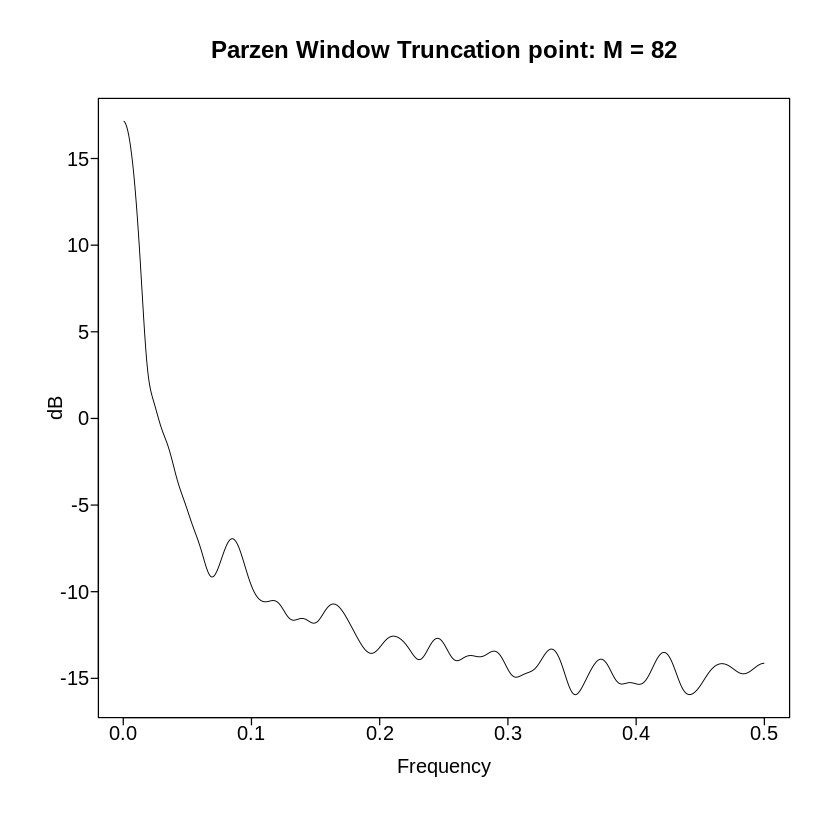

In [86]:
parzen.wge(noaa.raw$Global.Land.and.Ocean.Temperature.Anomalies,trunc=0)

Unlike the rest of the data, the Land and Ocean Anomaly dataset has little to no sinusoidal behavior. Instead, it has an almost linear trend, with the surface temperature increasing with time. This point is backed by the spikes at a frequency of 0 for the periodogram and parzen window. The sample autocorrelation plot also shows gradual dampening with increasing lags.

## Identifying El Ni&ntilde;o

In order to identify El Ni&ntilde;o events, we must look at the ONI and MEI values for each year. Anything above 0.5 is identified as El Ni&ntilde;o. 


In [96]:
elnino.oni <- oni.raw[oni.raw$DJF > 0.5,]
elnino.mei <- mei.raw[mei.raw$DJ > 0.5,]
elnino.oni$year
elnino.mei$Year

[1] 1964 1966 1969 1973 1977 1978 1980 1983 1987 1988 1992 1995 1998 2003 2005
[16] 2007 2010 2016

[1] "1983" "1987" "1988" "1992" "1993" "1995" "1998" "2003" "2007" "2010"
[11] "2016"

As we can see, our ONI values indicate El Ni&ntilde;o years of 1964, 1966, 1969, 1973, 1977, 1978, 1980, 1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, and 2016. Our MEI values indicate 1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, and 2016 as El Ni&ntilde;o years. As we can see, all overlapping years were in agreement between the two indices. In addition, our analysis of a period of about 3 years also appear to be correct, as each of the El Ni&ntilde;o years is about 3 years apart from others on average.

## Discussion


In this lab, I downloaded, imported, and cleaned five datasets and turned them into four different time series. These datasets include the ONI, MEI, EMDAT, Population, and Land and Ocean Anomaly (LOA) Datasets. From these datasets, I made the ONI, MEI, PAD, and LOA time series, with the EMDAT and Population datasets both being combined to calculate the yearly PAD. For each time series, I plotted the time series as well as a periodogram, parzen window, and sample autocorrelation. Lastly, I tried to identify which years had El Nin&ntilde;o events.

The different types of plots that I used in my analysis worked well for the most part, however I feel like there may have been an error in my PAD data that I was not able to find a solution to. For the rest of the datasets, my analysis seemed to mostly match that of the Lam et al paper. With my PAD time series, I had differing values from the paper and my results also seemed to be skewed. On the whole, the time series and the parzen window were the most useful for identifying patterns, however the periodogram did also produce similar conclusions as the parzen window. The sample autocorrelation in this case was the least effective, as each of the plots had a large drop after lag 0, which made it difficult to identify trends.

I was able to find a reoccurring pattern between the two of the three time series used in the paper (ONI and MEI), where there was a period of about 3 years for the El Ni&ntilde;o events. Due to my error with the PAD data, I was not able to identify as clear of a pattern, however there were several peak frequencies that did not represent the data as well. In the last dataset that I chose because I thought it would have a similar pattern, I found that the pattern was actually linear instead of sinusoidal, so the tools that I used to analyze the data were not as useful as with the other datasets.

Along the way, I had many challenges trying to clean the data, as I am not very experienced with R. In order to fix this, it required a lot of research as well as trial and error, but for the most part it went well. I still had some issues with the PAD data that I was not able to fix, although I thought it had been fixed until I saw the results.

# References

Lam, H., Haines, A., McGregor, G., Chan, E., &amp; Hajat, S. (2019, August 28). Time-Series study of associations between rates of people affected by disasters and the El Niño Southern OSCILLATION (ENSO) CYCLE. Retrieved March 07, 2021, from https://www.mdpi.com/1660-4601/16/17/3146/htm